In [1]:
%%bash 
#Make constraint input. 
rm ../../abeta_c2/resid_sel_all.dat
for ((c=1;c<=41-1;c+=4))do
 for ((j=$c+4;j<=41;j+=4))do
  echo $c $j >> ../../abeta_c2/resid_sel_all.dat
done 
done


In [2]:
import pandas as pd
import numpy as np
import mdtraj as md
import subprocess
import glob
import matplotlib.pyplot as plt

#The contact map is in distance (Angstong)
cwd = os.getcwd()
data_f=str(cwd)+"../../abeta_c2/"

AF_contacts_file=data_f+"mean.csv"
AF_resid_sel_file=data_f+"resid_sel_all.dat"
AF_contacts_stdev_file=data_f+"std.csv"
AF_contacts=pd.read_csv(AF_contacts_file)
AF_contacts_stdev=pd.read_csv(AF_contacts_stdev_file)
AF_contacts
AF_contacts_stdev

exp=[]
labels=[]
lista=[]
residue_pairs=np.loadtxt(AF_resid_sel_file,usecols=(0,1))
for i in range(len(residue_pairs)):

    r1=int(residue_pairs[i][0])
    r2=str(int(residue_pairs[i][1]))
    #This is to accoun that the trajectory starts residues from 1 while the AF contact map from 0.
    r1_m1=int(residue_pairs[i][0]-1)
    
    r1_label=str(r1)
    r2_label=r2
    
    #The first index of loc needs to be integer and minus1, since it starts from 0. index 2 needs to be str and reads properly
    exp.append([AF_contacts.loc[r1_m1].at[r2],AF_contacts_stdev.loc[r1_m1].at[r2]])
    labels.append('resid_'+r1_label+'-'+r2_label)

    lista.append([int(r1_label),int(r2_label)])

exp = np.array(exp)

labels=np.array(labels)
labels
print(exp)
print (labels)
len(exp)
print(len(lista))
print(lista)
with open(data_f+'AF_contacts_constr.txt', 'w') as f:
    f.write("# DATA=JCOUPLINGS\n")
    for line in range(len(exp)):
        f.write(str(labels[line])+" "+str(exp[line,0])+" "+str(exp[line,1])+"\n")
        

[[10.71032397  2.59801368]
 [16.33515266  3.86540266]
 [17.52215194  4.66176749]
 [18.66638437  3.98278101]
 [19.18752903  3.91046171]
 [19.21121781  4.17408406]
 [18.43959306  4.58211706]
 [18.15806134  4.29171225]
 [18.53225694  4.2550474 ]
 [18.24433591  4.49117974]
 [10.16640244  2.41658677]
 [15.33887697  4.56132201]
 [17.66969063  4.17735436]
 [19.03941716  4.07518795]
 [19.23181322  4.19736363]
 [18.56219347  4.49964635]
 [18.32740716  4.18377226]
 [18.30589934  4.25787563]
 [17.92609781  4.51546478]
 [10.95246384  2.52130932]
 [15.38716528  4.41985859]
 [17.89327072  4.77840996]
 [19.45378966  3.8695763 ]
 [18.92539834  4.17117743]
 [17.74902247  4.31522007]
 [17.45719847  4.36293964]
 [17.69409403  4.69054563]
 [10.49538953  2.77097465]
 [17.33264006  4.54625941]
 [19.91641284  3.42619218]
 [19.45896747  3.66191503]
 [16.60707372  4.1561247 ]
 [15.74836038  4.68759759]
 [17.4796525   4.57558589]
 [12.01397191  2.88549327]
 [18.51441278  3.72604383]
 [17.24275072  3.90154661]
 

In [3]:
#Make the plumed file
pdb=data_f+'../priors/topol_abeta_C2.pdb'
xtc=data_f+'../priors/abeta_C2.xtc'

topology = md.load(pdb).topology
traj = md.load(xtc, top=pdb)

lista_CB=[]
for i in lista:
    if (topology.select("residue "+str(i[0])+" and name CA and (resname  GLY PRO)")):
        res1=topology.select("residue "+str(i[0])+" and name CA and (resname  GLY PRO)")
        #print(i[0],res1)
    if (topology.select("residue "+str(i[1])+" and name CA and (resname  GLY PRO)")):
        res2=topology.select("residue "+str(i[1])+" and name CA and (resname  GLY PRO)")
        #print(i[1],res2)
    if (topology.select("residue "+str(i[0])+" and name CB")):
        res1=topology.select('name CB and residue '+str(i[0]))
        #print(i[0],res1)
    if (topology.select("residue "+str(i[1])+" and name CB")):
        res2=topology.select('name CB and residue '+str(i[1]))
        #print(i[1],res2)
    lista_CB.append([int(res1),int(res2)])

print('CB-atomlist')
for j in lista_CB:
    print(j[0],j[1])
print(len(lista_CB))
print(lista_CB)

for i in lista:
    print(i)


distance_nm=md.compute_distances(traj,lista_CB)

#This is converting to Angstorng
calc=distance_nm[:] * 10
print(calc)

with open(data_f+'AF_contacts_calc.txt', 'w') as f:
    for line in range(len(calc[:,0])):

        f.write(str(line)+" ")
        for j in range(len(lista)): 
            f.write(str(calc[line,j])+" ")
        
        f.write("\n")        
        



/var/folders/y_/gjd0c6hx6tz2nvvyhp0sh1380000gn/T/ipykernel_13340/1482199348.py:11: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (topology.select("residue "+str(i[0])+" and name CA and (resname  GLY PRO)")):
/var/folders/y_/gjd0c6hx6tz2nvvyhp0sh1380000gn/T/ipykernel_13340/1482199348.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (topology.select("residue "+str(i[1])+" and name CA and (resname  GLY PRO)")):
/var/folders/y_/gjd0c6hx6tz2nvvyhp0sh1380000gn/T/ipykernel_13340/1482199348.py:20: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (topology.select(

CB-atomlist
6 63
6 125
6 186
6 259
6 334
6 385
6 439
6 494
6 553
6 601
63 125
63 186
63 259
63 334
63 385
63 439
63 494
63 553
63 601
125 186
125 259
125 334
125 385
125 439
125 494
125 553
125 601
186 259
186 334
186 385
186 439
186 494
186 553
186 601
259 334
259 385
259 439
259 494
259 553
259 601
334 385
334 439
334 494
334 553
334 601
385 439
385 494
385 553
385 601
439 494
439 553
439 601
494 553
494 601
553 601
55
[[6, 63], [6, 125], [6, 186], [6, 259], [6, 334], [6, 385], [6, 439], [6, 494], [6, 553], [6, 601], [63, 125], [63, 186], [63, 259], [63, 334], [63, 385], [63, 439], [63, 494], [63, 553], [63, 601], [125, 186], [125, 259], [125, 334], [125, 385], [125, 439], [125, 494], [125, 553], [125, 601], [186, 259], [186, 334], [186, 385], [186, 439], [186, 494], [186, 553], [186, 601], [259, 334], [259, 385], [259, 439], [259, 494], [259, 553], [259, 601], [334, 385], [334, 439], [334, 494], [334, 553], [334, 601], [385, 439], [385, 494], [385, 553], [385, 601], [439, 494], [439

In [4]:
print(calc.shape)

(5898, 55)


In [5]:

file_name=data_f+'AF_CG.dat'
file=open(data_f+'CG_distances.dat', 'w')
file.write("\n")
for i in range(0,calc.shape[1]):
    file.write(str(np.average(calc[:,i]))+"\n")
file.close()

lis=subprocess.call(['paste'] + glob.glob(data_f+'AF_contacts_constr.txt') + [data_f+'CG_distances.dat'] , stdout=open(file_name, 'w') )


    

In [6]:
rg_A=md.compute_rg(traj)*10


In [15]:
#traj[1]
topology = md.load(pdb).topology
print(topology)

table, bonds = topology.to_dataframe()
print(table.head())

<mdtraj.Topology with 1 chains, 42 residues, 627 atoms, 633 bonds>
   serial name element  resSeq resName  chainID segmentID
0       1    N       N       1     ASP        0          
1       2    H       H       1     ASP        0          
2       3   H2       H       1     ASP        0          
3       4   H3       H       1     ASP        0          
4       5   CA       C       1     ASP        0          


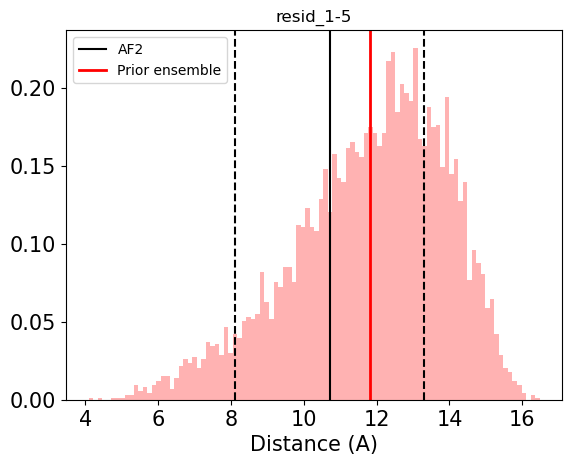

In [7]:

i=1
# plot experimental average and error
_ = plt.axvline(exp[i-1,0],c='k',label="AF2")
_ = plt.axvline(exp[i-1,0]-exp[i-1,1],c='k',linestyle="--")
_ = plt.axvline(exp[i-1,0]+exp[i-1,1],c='k',linestyle="--")

# Plot calculated average
average = np.average(calc[:,i-1])
_ = plt.axvline(average,c='r',label="Prior ensemble",lw=2)

# plot histogram of the data
_ = plt.hist(calc[:,i-1],bins=100,density=True,alpha=0.3,color='r')
plt.title(labels[i-1])
plt.xlabel("Distance (A)",size=15) 
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend()
plt.savefig(data_f+str(labels[i-1])+'.pdf')

In this case we can see that the calculated average is within the experimental error, which is great. 
Let's consider now a different datapoint

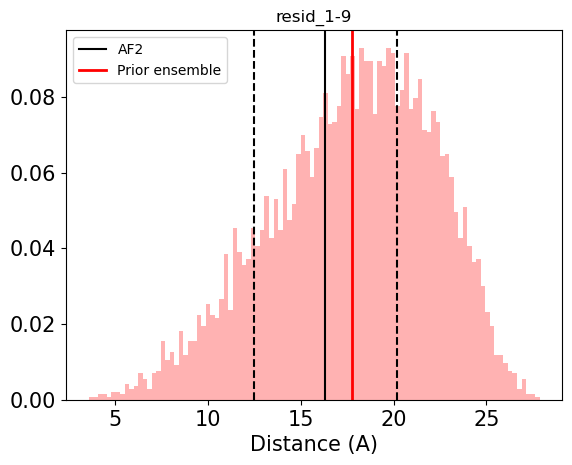

In [17]:
i=2    
# plot experimental average and error
_ = plt.axvline(exp[i-1,0],c='k',label="AF2")
_ = plt.axvline(exp[i-1,0]-exp[i-1,1],c='k',linestyle="--")
_ = plt.axvline(exp[i-1,0]+exp[i-1,1],c='k',linestyle="--")

# Plot calculated average
average = np.average(calc[:,i-1])
_ = plt.axvline(average,c='r',label="Prior ensemble",lw=2)

# plot histogram of the data
_ = plt.hist(calc[:,i-1],bins=100,density=True,alpha=0.3,color='r')

plt.title(labels[i-1])
plt.legend()

plt.xlabel("Distance (A)",size=15) 
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.savefig(data_f+str(labels[i-1])+'.pdf')
plt.show()
plt.close()

In this case the calculated average is clearly far away from the experiment. In general, it is convenient to plot all the datapoints together in the following fashion:


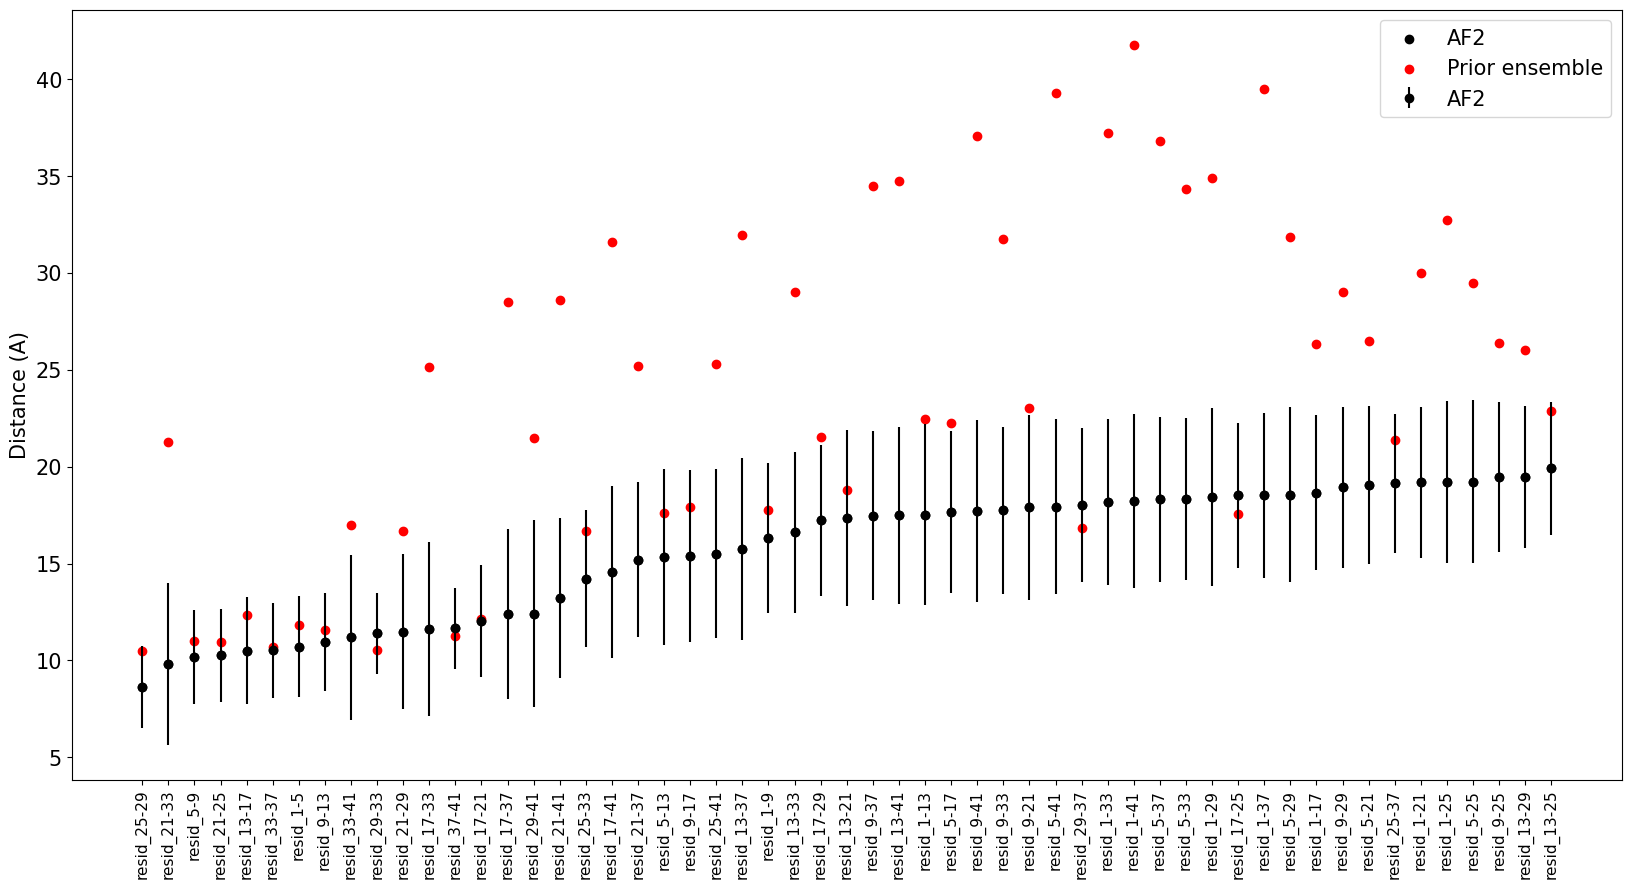

In [18]:
averages = np.average(calc[:,0:],axis=0)
idx_ordered = np.argsort(exp[:,0])

fig, ax = plt.subplots(figsize=(20, 10))

xx = range(len(labels))
plt.errorbar(xx, exp[idx_ordered,0],exp[idx_ordered,1],c='k',fmt="o",label="AF2")
plt.scatter(xx,exp[idx_ordered,0],c='k',label="AF2")


plt.scatter(xx,averages[idx_ordered],c='r',label="Prior ensemble")
plt.legend()
plt.ylabel("Distance (A)",size=15) 
plt.yticks(fontsize=15)
plt.legend(fontsize=15) 
_ = plt.xticks(xx,[labels[l] for l in idx_ordered],rotation=90,size=11)



# 2 BME reweighting

We are now ready to run the BME script. First, we have to import the module and specify the experimental/calculated datafiles 



In [8]:
import sys,os
import BME as BME
bme_dir = os.getcwd().split("notebook")[0]
sys.path.append(bme_dir)
print(bme_dir)

exp_file = data_f+"AF_contacts_constr.txt"
calc_file = data_f+"AF_contacts_calc.txt" 


/Volumes/BROTZAKIS/PROJECTS_LOCAL/ALPHA_IDP/BME_IDP/
/Volumes/BROTZAKIS/PROJECTS_LOCAL/ALPHA_IDP/abeta/mmseqs_calvados_allatom/AF_contacts_constr.txt
/Volumes/BROTZAKIS/PROJECTS_LOCAL/ALPHA_IDP/abeta/mmseqs_calvados_allatom/AF_contacts_calc.txt


And then we run the script itself

In [9]:


rew = BME.Reweight("example_AF_IDP")

print(rew)
# load the experimental and calculated datasets
rew.load(exp_file,calc_file)

# fit the data 
chi2_before, chi2_after, phi = rew.fit(theta=10)

# print statistics
print("Chi2 before BME %.2f" % chi2_before)
print("Chi2 after  BME %.2f" % chi2_after)
print("Fraction of effective frames %.2f" % phi)

Chi2 before BME 6.49
Chi2 after  BME 0.45
Fraction of effective frames 0.14


By definition the error before the fit is larger compared to the error after fitting. The ouptut of the fitting procedure is in essence a new set of weights.  These weights can be retrieved using the function

```
w_new = rew.get_weights()
```

And can be used to calculate any desired quantity (angle/distance distributions, averages, etc.)

We can first compare them to the initial weights  $w_0 = 1/n$


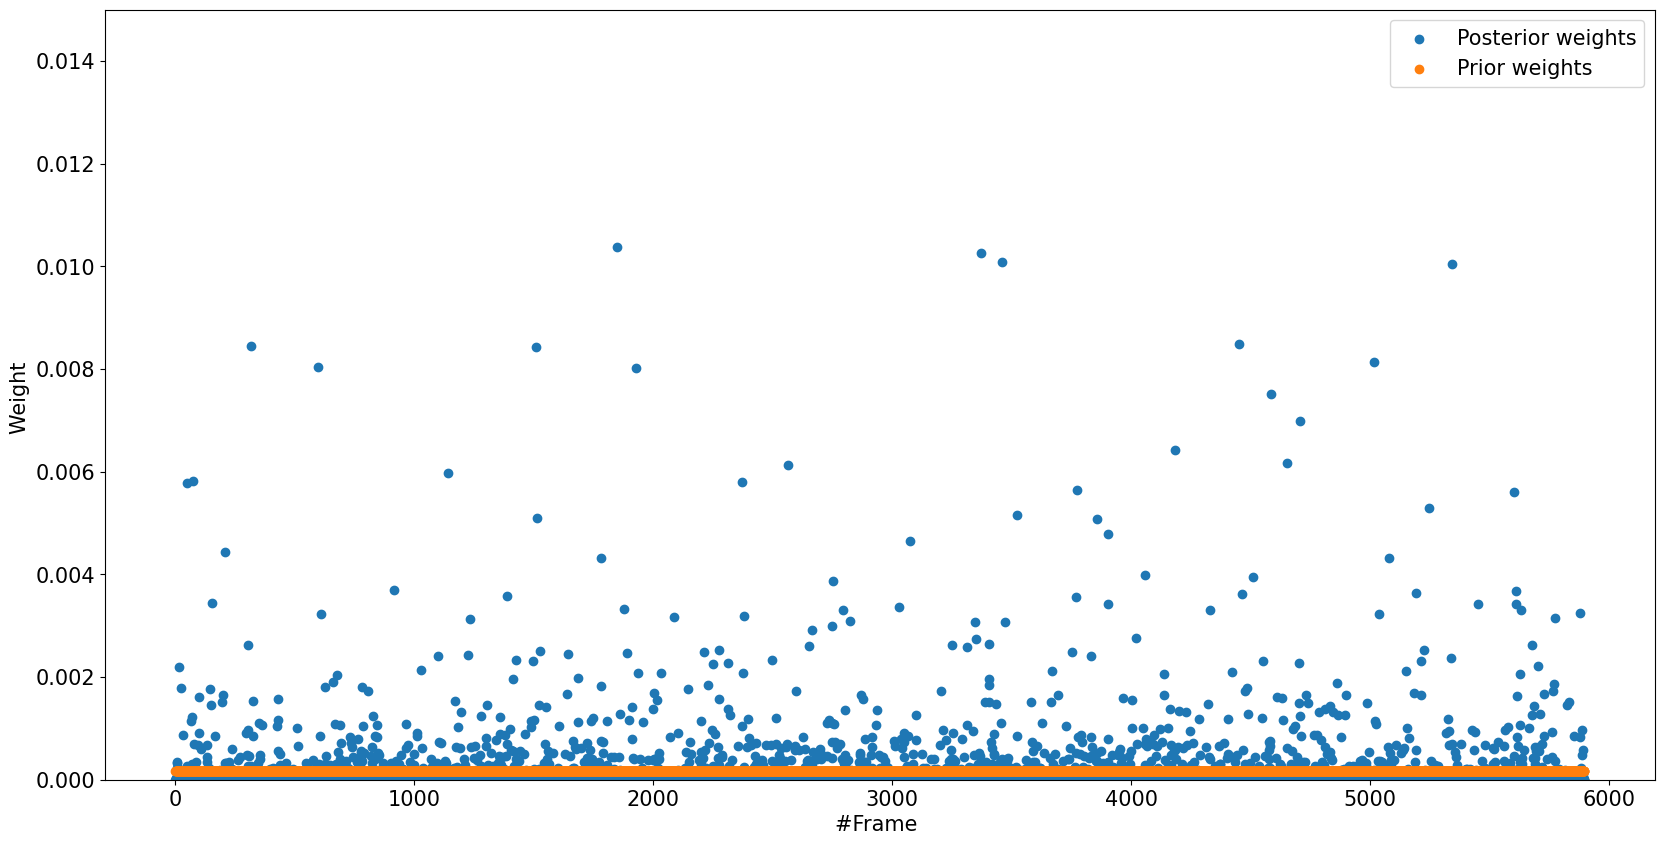

In [26]:
fig, ax = plt.subplots(figsize=(20, 10))
w0 = rew.get_w0()
w_new = rew.get_weights()

plt.scatter(range(len(w0)),w_new,label="Posterior weights")
plt.scatter(range(len(w0)),w0,label="Prior weights")
plt.ylim(0,0.015)
plt.legend()
plt.xlabel("#Frame ",size=15) 
plt.ylabel("Weight ",size=15) 
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=15) 
plt.show()
plt.close()




We can see that the initial weights are all equal (each weight is 1/20000). While in the optimized weights some of them have a large weights, and many more have a weight which is almost zero. 
One possible way to quantify how much the weights are modified is given by the fraction of effective frame $\phi$.
When we choose a small parameter $theta$, the $\chi^2$ after minimization will be small, but at the cost of "throwing away" many samples (small $\phi$). 

For example, this is the expected behavior of $\phi$ and $\chi^2_{opt}/\chi^2_0$ for different values of theta.

/Volumes/BROTZAKIS/PROJECTS_LOCAL/ALPHA_IDP/BME_IDP/BME.py:328: RuntimeWarning: overflow encountered in exp
  w_opt = self.w0*np.exp(arg)
/Volumes/BROTZAKIS/PROJECTS_LOCAL/ALPHA_IDP/BME_IDP/BME.py:329: RuntimeWarning: invalid value encountered in true_divide
  w_opt /= np.sum(w_opt)


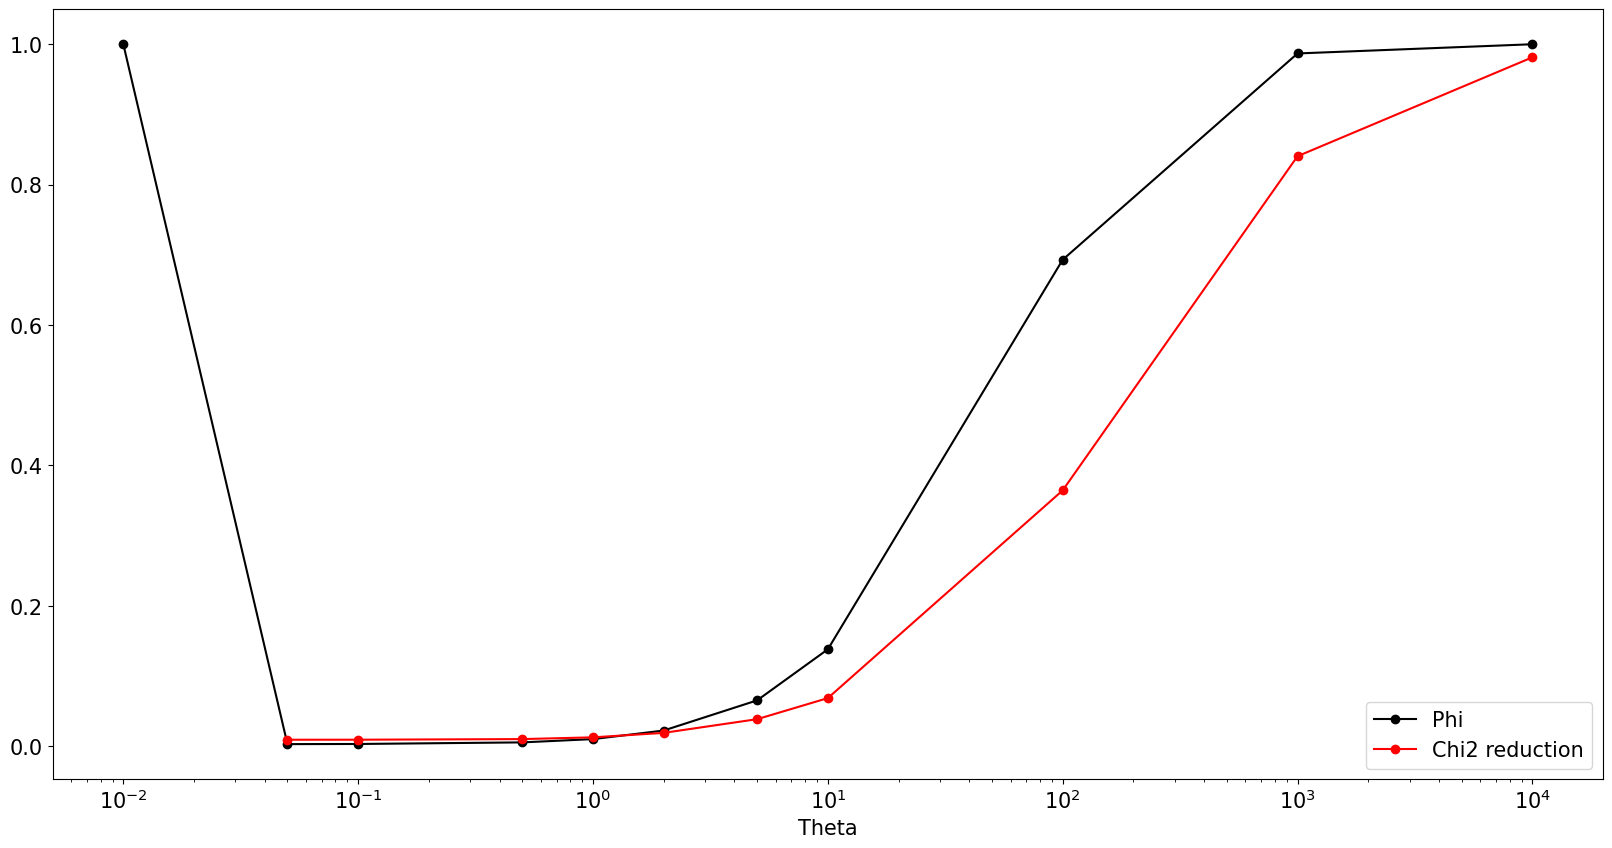

In [27]:
thetas = [0.01,0.05,0.1,0.5,1,2,5,10,100,1000,10000]
#thetas = [0.01,0.05,0.1,0.5,1,2,5,10,100,1000,10000]

fig, ax = plt.subplots(figsize=(20, 10))

chi2 = []
phis = []
for t in thetas:
    chi2_before, chi2_after, phi = rew.fit(theta=t)
    phis.append(phi)
    chi2.append(chi2_after/chi2_before)

plt.plot(thetas,phis,"-o",label="Phi",c="k")
plt.plot(thetas,chi2,"-o",label="Chi2 reduction",c="r")
plt.legend()
plt.xscale('log')
plt.xlabel("Theta",size=15)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(fontsize=15) 
plt.savefig(data_f+'optim_theta.pdf',bbox_inches='tight')




# 3. Use the optimized weights. 

The optimal weights can be used to calculate averages. BME provides a simple way of comparing the original with the optimized averages using the function

```
stats = rew.predict(exp_file,calc_file,out_file)
```

This function outputs some statistics and (optionally) a file with all the averages. Let's see it in action:

In [10]:
chi2_before, chi2_after, phi = rew.fit(theta=10)


stats = rew.predict(exp_file,calc_file,"example_AF_IDP")

print("%10s %10s %10s" % (" ","Original","Optimized"))
print("%10s %10.3f %10.3f" % ("Chi2",stats[0],stats[3]))
print("%10s %10.3f %10.3f" % ("RMSD",stats[1],stats[4]))
print("%10s %10d %10d" % ("Violations",stats[2],stats[5]))

print("--------------------------------------")
print("")



             Original  Optimized
      Chi2      6.488      0.446
      RMSD     11.062      2.847
Violations         36          9
--------------------------------------



The file "example_01_couplings" contains more info: the experimental average and error, and the calculated averages before and after reweighting. The last column indicates if the calculated averages are within the experimental error (0) or not (1). Therefore, 00 means that both the original and reweighted averages are within error, 10 means that only the reweighted average is within the error and so on. 


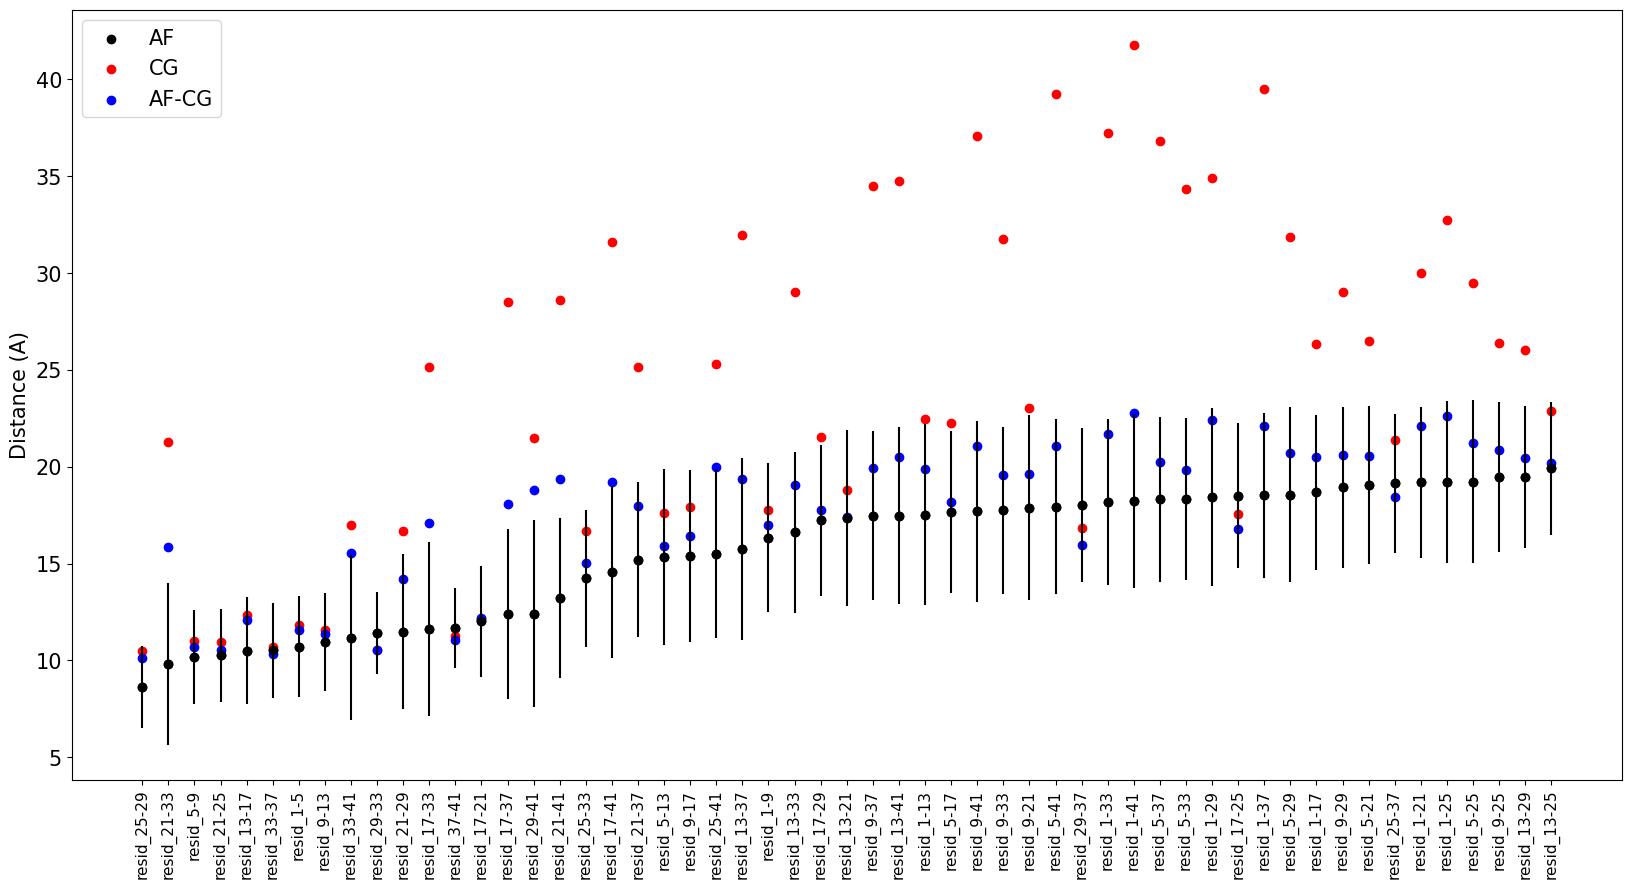

In [11]:

results = np.loadtxt("example_AF_IDP",usecols=(1,2,3,4,5))
labels = np.loadtxt("example_AF_IDP",usecols=(0),dtype=str)

# order by magnitude to make the plot nicer
idx_ordered = np.argsort(results[:,0])


fig, ax = plt.subplots(figsize=(20, 10))
xx = range(len(labels))
# plot experiment
plt.errorbar(xx, results[idx_ordered,0],results[idx_ordered,1],c='k',fmt="o",label="_nolegend_")
plt.scatter(xx, results[idx_ordered,0],c='k',label="AF")


plt.scatter(xx,results[idx_ordered,2],c='r',label="CG")
plt.scatter(xx,results[idx_ordered,3],c='b',label="AF-CG")
plt.yticks(fontsize=15)
plt.legend(fontsize=15,loc="upper left") 

plt.ylabel("Distance (A)",size=15)
_ = plt.xticks(xx,[labels[l] for l in idx_ordered],rotation=90,size=11)


plt.savefig(data_f+'Prior_Posterior_AF2_distances.pdf',bbox_inches='tight')

This looks great. The alogrithm is doing exactly what it is supposed to do. We can further inspect C2-H1H2 and see what happens to the reweighted distribution:

5898


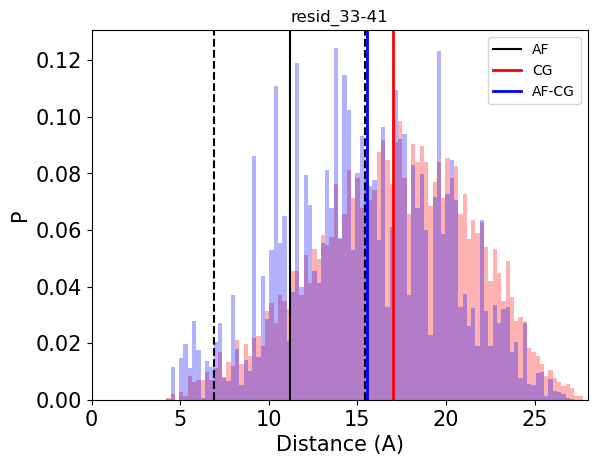

In [35]:
i=54
# plot experimental average and error
_ = plt.axvline(results[i-1,0],c='k',label="AF")
_ = plt.axvline(results[i-1,0]-results[i-1,1],c='k',linestyle="--")
_ = plt.axvline(results[i-1,0]+results[i-1,1],c='k',linestyle="--")

# Plot calculated average
average = np.average(calc[:,i-1])
_ = plt.axvline(average,c='r',label="CG",lw=2)

print(len(w_new))
average_optimized = np.average(calc[:,i-1],weights=w_new)
_ = plt.axvline(average_optimized,c='b',label="AF-CG",lw=2)

# plot histogram of the data
_ = plt.hist(calc[:,i-1],bins=100,density=True,alpha=0.3,color='r')

_ = plt.hist(calc[:,i-1],bins=100,density=True,alpha=0.3,color='b',weights=w_new)

plt.title(labels[i-1])
plt.xlabel("Distance (A)",size=15) 
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("P",size=15) 
plt.xlim(0,28)
plt.legend()
plt.savefig(data_f+str(labels[i-1])+'_post.pdf',bbox_inches='tight')



#plt.legend()
plt.show()
plt.close()

5898


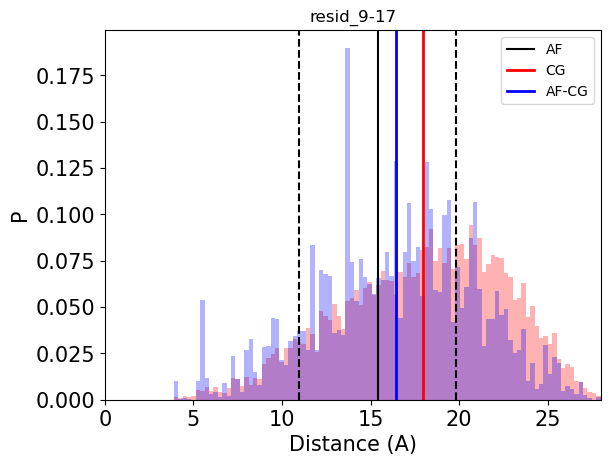

In [36]:
i=21
# plot experimental average and error
_ = plt.axvline(results[i-1,0],c='k',label="AF")
_ = plt.axvline(results[i-1,0]-results[i-1,1],c='k',linestyle="--")
_ = plt.axvline(results[i-1,0]+results[i-1,1],c='k',linestyle="--")

# Plot calculated average
average = np.average(calc[:,i-1])
_ = plt.axvline(average,c='r',label="CG",lw=2)

print(len(w_new))
average_optimized = np.average(calc[:,i-1],weights=w_new)
_ = plt.axvline(average_optimized,c='b',label="AF-CG",lw=2)

# plot histogram of the data
_ = plt.hist(calc[:,i-1],bins=100,density=True,alpha=0.3,color='r')

_ = plt.hist(calc[:,i-1],bins=100,density=True,alpha=0.3,color='b',weights=w_new)

plt.title(labels[i-1])
plt.xlabel("Distance (A)",size=15) 
plt.ylabel("P",size=15) 
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(0,28)
plt.legend()
plt.savefig(data_f+str(labels[i-1])+'_post.pdf',bbox_inches='tight')



plt.show()
plt.close()

5898


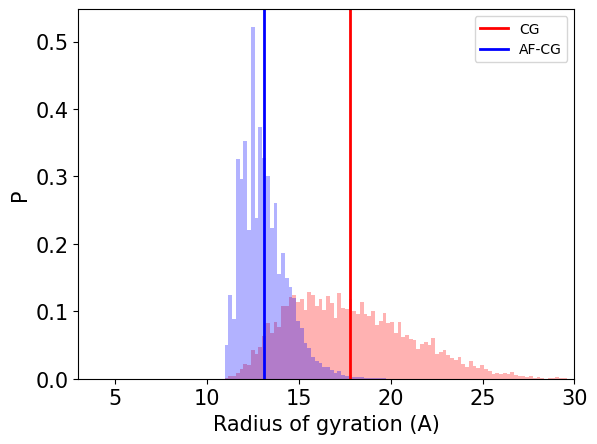

17.77521295818935 17.773210839454606 3.335695261167129
13.113435761440504 13.111620611799363 1.3407227368456913


In [37]:
#Rg
# Plot calculated average
i=0
average = np.average(rg_A[:])
#std = np.std(rg_A[:])
_ = plt.axvline(average,c='r',label="CG",lw=2)

print(len(w_new))
average_optimized = np.average(rg_A[:],weights=w_new)
#std_optimized = np.std(rg_A[:],weights=w_new)
_ = plt.axvline(average_optimized,c='b',label="AF-CG",lw=2)

# plot histogram of the data
_ = plt.hist(rg_A[:],bins=100,density=True,alpha=0.3,color='r')

_ = plt.hist(rg_A[:],bins=100,density=True,alpha=0.3,color='b',weights=w_new)

#plt.yscale('log')

plt.xlabel('Radius of gyration (A)',fontsize=15)
plt.ylabel('P',fontsize=15)
plt.xlim(3,30)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend()
#plt.show()



plt.savefig(data_f+'R_g.pdf',bbox_inches='tight')

plt.show()
plt.close()

counts, bins = np.histogram(rg_A[:])
mids = 0.5*(bins[1:] + bins[:-1])
probs = counts / np.sum(counts)

mean = np.sum(probs * mids)  
sd = np.sqrt(np.sum(probs * (mids - mean)**2))

print(average,mean,sd)

counts, bins = np.histogram(rg_A[:],weights=w_new)
mids = 0.5*(bins[1:] + bins[:-1])
probs = counts / np.sum(counts)

mean = np.sum(probs * mids)  
sd = np.sqrt(np.sum(probs * (mids - mean)**2))

print(average_optimized,mean,sd)

In [38]:




dssp=md.compute_dssp(traj,simplified='false')
print('dssp data shape', dssp.shape)
residuesALL=b = [i+1 for i in range(42)]
array2 = np.vstack((residuesALL,dssp))
dssp=np.c_[["" for x in range(len(array2))],array2]

df2=pd.DataFrame(data=dssp[1:,1:],
                index=dssp[1:,0],
                columns=dssp[0,1:])

print(pd.DataFrame(data=dssp[1:,1:],
                  index=dssp[1:,0],
                  columns=dssp[0,1:]))

df2.to_csv(data_f+'dssp.dat', header=True, index=None, sep=' ', mode='w')


dssp data shape (5898, 42)
    1  2  3  4  5  6  7  8  9 10  ... 33 34 35 36 37 38 39 40 41 42
    C  C  C  C  C  C  C  C  C  C  ...  C  C  C  C  C  C  C  C  C  C
    C  C  C  C  C  C  C  C  C  C  ...  C  C  C  C  C  C  C  C  C  C
    C  C  C  C  C  C  C  C  C  C  ...  C  C  C  C  C  C  C  C  C  C
    C  C  C  C  C  C  C  C  C  C  ...  C  C  C  C  C  C  C  C  C  C
    C  C  C  C  C  C  C  C  C  C  ...  C  C  C  C  C  C  C  C  C  C
.. .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. ..
    C  C  C  C  C  C  C  C  C  C  ...  C  C  C  C  C  C  C  C  C  C
    C  C  C  C  C  C  C  C  C  C  ...  C  C  C  C  C  C  C  C  C  C
    C  C  C  C  C  C  C  C  C  C  ...  C  C  C  C  C  C  C  C  C  C
    C  C  C  C  C  C  C  C  C  C  ...  C  C  C  C  C  C  C  C  C  C
    C  C  C  C  C  C  C  C  C  C  ...  C  C  C  C  C  C  C  C  C  C

[5898 rows x 42 columns]


In [39]:

print(len(dssp)-1)

dsspC_resid=[]
dsspH_resid=[]
dsspE_resid=[]

for resid in range(1,43):
    dummyC=0
    dummyH=0
    dummyE=0
    for t in range(0,len(dssp)-1):
        t_i=t+1
       #print(weights_10[t],sasa[t_i][resid])
        if (dssp[t_i][resid] =='C'):
            dummyC+=float(w0[t])
        elif(dssp[t_i][resid] =='H'):
            dummyH+=float(w0[t])
        elif(dssp[t_i][resid] =='E'):
            dummyE+=float(w0[t])
        
    dsspC_resid.append(dummyC)
    dsspH_resid.append(dummyH)
    dsspE_resid.append(dummyE)
    print(resid,dummyC,dummyH,dummyE)


5898
1 1.0000000000001181 0 0
2 0.9989827060021526 0.000508646998982706 0.000508646998982706
3 0.9989827060021526 0.0010172939979654122 0
4 0.9986436080028307 0.0010172939979654122 0.00033909799932180403
5 0.9991522550018135 0.000508646998982706 0.00033909799932180403
6 0.9972872160055433 0.0020345879959308244 0.0006781959986436081
7 0.9964394710072386 0.003560528992878943 0
8 0.9961003730079168 0.003730077992539845 0.00016954899966090201
9 0.9964394710072386 0.0020345879959308244 0.0015259409969481184
10 0.9988131570024916 0.0010172939979654122 0.00016954899966090201
11 0.9989827060021526 0.0010172939979654122 0
12 0.9976263140048651 0.0011868429976263143 0.0011868429976263143
13 0.9984740590031698 0.0013563919972872163 0.00016954899966090201
14 0.9986436080028307 0.0011868429976263143 0.00016954899966090201
15 0.9983045100035088 0.0011868429976263143 0.000508646998982706
16 0.9991522550018135 0.0006781959986436081 0.00016954899966090201
17 0.9986436080028307 0.0006781959986436081 0.0

42


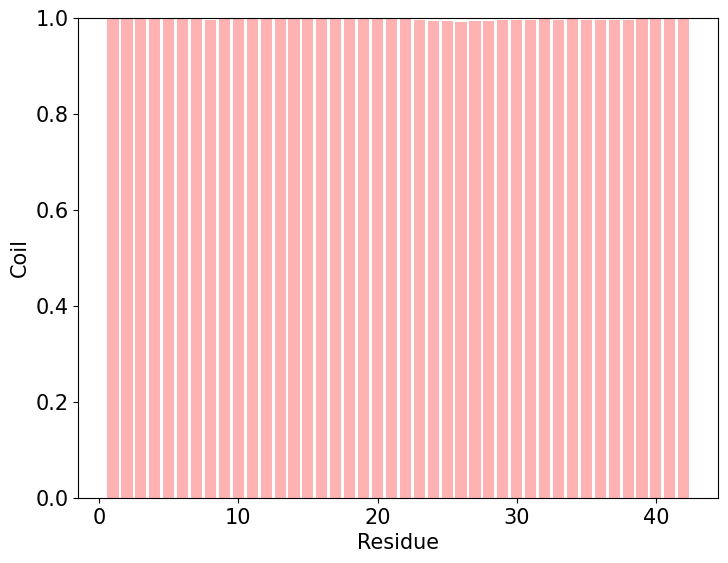

In [40]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
print(len(dsspC_resid))
ax.bar(residuesALL,dsspC_resid,color="red",alpha=0.3)
plt.ylim(0,1)
plt.xlabel('Residue',fontsize=15)
plt.ylabel('Coil',fontsize=15)
ax.tick_params(axis='both', labelsize=15)

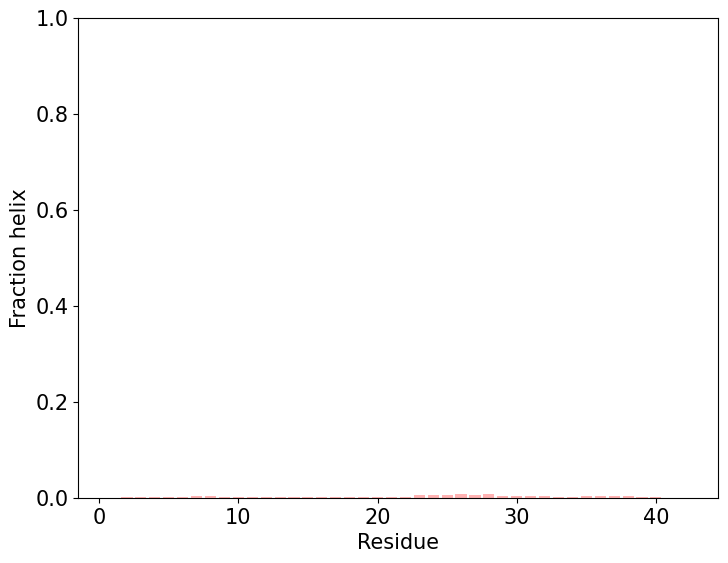

In [41]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(residuesALL,dsspH_resid,color="red",alpha=0.3)
plt.ylim(0,1)
plt.xlabel('Residue',fontsize=15)
plt.ylabel('Fraction helix',fontsize=15)
ax.tick_params(axis='both', labelsize=15)

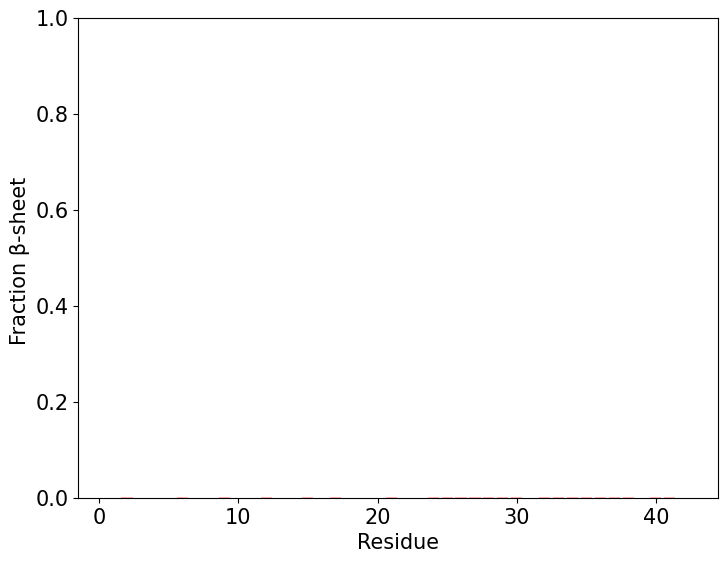

In [42]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(residuesALL,dsspE_resid,color="red",alpha=0.3)
plt.ylim(0,1)
plt.xlabel('Residue',fontsize=15)
plt.ylabel('Fraction β-sheet ',fontsize=15)
ax.tick_params(axis='both', labelsize=15)

In [43]:

print(len(dssp)-1)

dsspC_resid_w=[]
dsspH_resid_w=[]
dsspE_resid_w=[]

for resid in range(1,43):
    dummyC=0
    dummyH=0
    dummyE=0
    for t in range(0,len(dssp)-1):
        t_i=t+1
        if (dssp[t_i][resid] =='C'):
            dummyC+=float(w_new[t])
        elif(dssp[t_i][resid] =='H'):
            dummyH+=float(w_new[t])
        elif(dssp[t_i][resid] =='E'):
            dummyE+=float(w_new[t])
        
    dsspC_resid_w.append(dummyC)
    dsspH_resid_w.append(dummyH)
    dsspE_resid_w.append(dummyE)
    print(resid,dummyC,dummyH,dummyE)



5898
1 1.000000000000002 0 0
2 0.9998283927377356 7.1527593830489535e-06 0.000164454502883608
3 0.9986461865660512 0.0013538134339508223 0
4 0.9977313622447253 0.0013538134339508223 0.0009148243213260775
5 0.998497221163555 0.0013466606745677733 0.00015611816187923662
6 0.9964804008546906 0.001999334267400464 0.0015202648779111027
7 0.9973707009648055 0.002629299035196346 0
8 0.9973703076545809 0.002629598318398126 9.402702270906946e-08
9 0.9958269213595227 0.0009235832058627507 0.0032494954346165062
10 0.9996138128093199 0.0003778508496779196 8.336341004371368e-06
11 0.9991521491214792 0.0008478508785229053 0
12 0.9978522071238433 0.0006606785815181374 0.001487114294640722
13 0.988700090122988 0.011294043407949261 5.866469064697343e-06
14 0.9891251960210431 0.010746425176563578 0.00012837880239509875
15 0.9889878629116025 0.010734027787996233 0.0002781093004032487
16 0.9998945112717748 9.962225916267005e-05 5.866469064697343e-06
17 0.9986890059646736 0.00045029953534743737 0.000860694

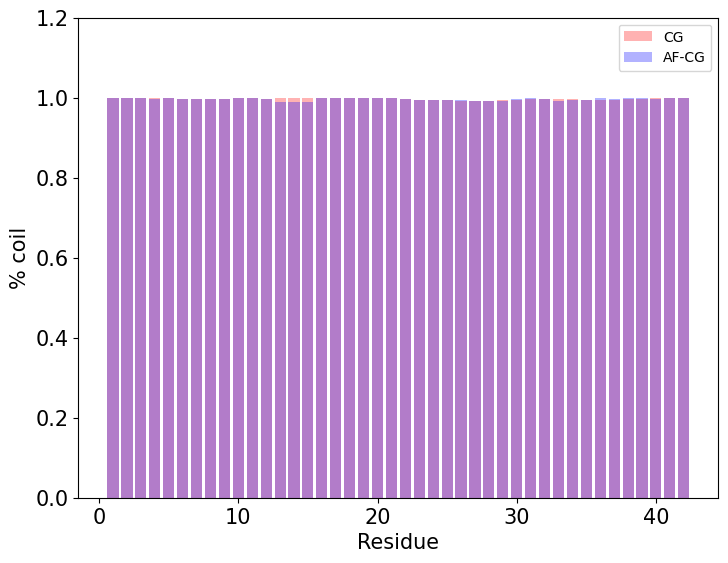

In [44]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(residuesALL,dsspC_resid,color="r",alpha=0.3,label="CG")
ax.bar(residuesALL,dsspC_resid_w,color="b",alpha=0.3,label="AF-CG")
plt.ylim(0,1.2)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.xlabel('Residue',fontsize=15)
plt.ylabel('% coil',fontsize=15)
ax.tick_params(axis='both', labelsize=15)
ax.legend()
plt.savefig(data_f+'coil.pdf',bbox_inches='tight')



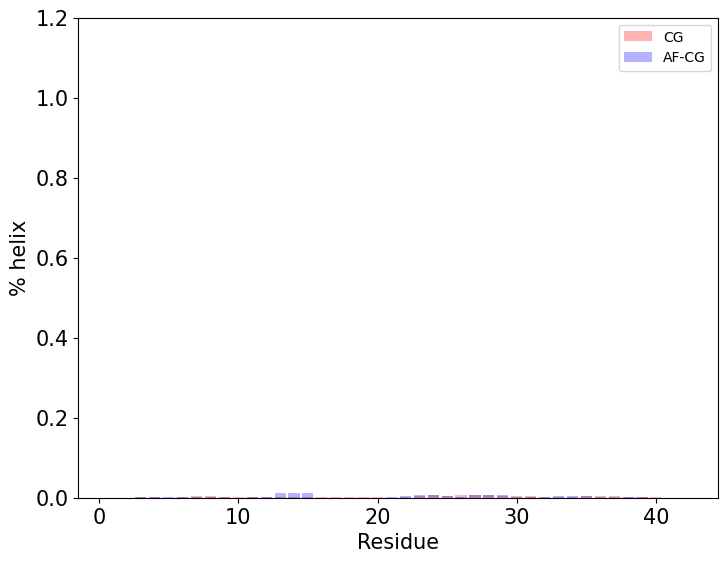

In [45]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(residuesALL,dsspH_resid,color="r",alpha=0.3,label="CG")
ax.bar(residuesALL,dsspH_resid_w,color="b",alpha=0.3,label="AF-CG")
plt.ylim(0,1.2)


plt.xlabel('Residue',fontsize=15)
plt.ylabel('% helix',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

ax.tick_params(axis='both', labelsize=15)
ax.legend()
plt.savefig(data_f+'helix.pdf',bbox_inches='tight')



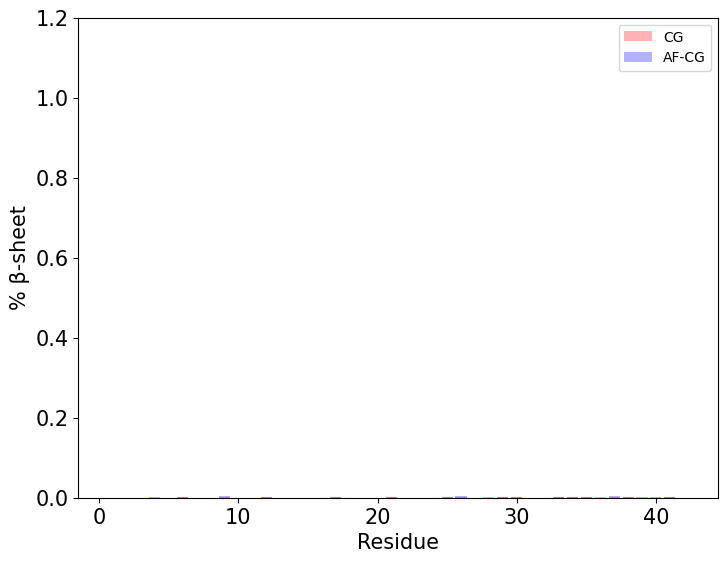

In [46]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(residuesALL,dsspE_resid,color="r",alpha=0.3,label="CG")
ax.bar(residuesALL,dsspE_resid_w,color="b",alpha=0.3,label="AF-CG")
plt.ylim(0,1.2)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Residue',fontsize=15)
plt.ylabel('% β-sheet',fontsize=15)
ax.tick_params(axis='both', labelsize=15)
ax.legend()
plt.savefig(data_f+'beta.pdf',bbox_inches='tight')

In [48]:
import itertools
import os
from pathlib import Path
N = 100
n_rounds = 1

folder = Path(data_f)
n_frames = traj.n_frames
inds = np.arange(n_frames)
ca_inds = topology.select("name CA")
protein_inds= topology.select("protein")

for i in range(n_rounds):
    (folder  / f"r{i}").mkdir(exist_ok=True)

    inds_sample = np.random.choice(inds, size=N, replace=False,p=w_new)
    traj[inds_sample].atom_slice(ca_inds).save_pdb((folder / f"r{i}" / f"conf-ca.pdb").as_posix())
    traj[inds_sample].atom_slice(protein_inds).save_pdb((folder / f"r{i}" / f"conf-protein.pdb").as_posix())

## Experimental comparison to NMR chem-shifts

In [49]:
f=open(data_f+'plumed_NMR.dat', 'w')
f.write("# DATA=JCOUPLINGS\n")
f.write("MOLINFO STRUCTURE="+str(pdb)+"\n")
f.write("WHOLEMOLECULES ENTITY0=1-627\n")
f.write("cs: CS2BACKBONE ATOMS=1-627 DATADIR="+str(data_f)+"nmr_data"+" NOPBC TEMPLATE=../priors/topol_abeta_C2.pdb\n")
f.write("PRINT ARG=* FILE=COLVAR_SHIFTS STRIDE=1\n")
f.close()



In [50]:
%%bash
# backcalculated chem. shifts from trajectory
plumed driver --mf_xtc ../priors/abeta_C2.xtc --plumed plumed_NMR.dat


DRIVER: Found molfile format trajectory xtc with name ../trajectories/calvados/ab/ab_bm_em.xtc
PLUMED: PLUMED is starting
PLUMED: Version: 2.8.0-dev (git: ba982d341) compiled on Feb 15 2021 at 19:38:30
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /Users/fdn/PLUMED/
PLUMED: For installed feature, see /Users/fdn/PLUMED//src/config/config.txt
PLUMED: Molecular dynamics engine: driver
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 627
PLUMED: File suffix: 
PLUMED: FILE: plumed_NMR.dat
PLUMED: Action MOLINFO
PLUMED:   with label @0
PLUMED:   pdb file named /Volumes/BROTZAKIS/PROJECTS_LOCAL/ALPHA_IDP/abeta/mmseqs_calvados_allatom/../trajectories/calvados/ab/ab_1_em.pdb contains 1 chains 
PLUMED:   chain named   contains residues 1 to 42 and atoms 1 to 627 
PLUMED: Action WHOLEMOLECULES
PLUMED

In [51]:
#Load in CAMSHIFT output from PLUMED using pandas 

#!!!!Note that since one neads to remove the ""#! Fields" label from the COLVAR_SHIFTS file before performing the analysis below.!!!
csAB = pd.read_csv(str(data_f)+'/COLVAR_SHIFTS', delim_whitespace=True)

In [53]:
#Make dictionaries of different chemical shift types
#For AB alone:
csAB_dict = {'ca': np.asarray(csAB.loc[:, 'cs.ca-0-2':'cs.ca-0-41']), 'cb': np.asarray(csAB.loc[:, 'cs.cb-0-2':'cs.cb-0-40']),
             'co': np.asarray(csAB.loc[:, 'cs.co-0-2':'cs.co-0-41']), 'ha': np.asarray(csAB.loc[:, 'cs.ha-0-2':'cs.ha-0-41']),
             'hn': np.asarray(csAB.loc[:, 'cs.hn-0-2':'cs.hn-0-41']), 'nh': np.asarray(csAB.loc[:, 'cs.nh-0-2':'cs.nh-0-41'])}




#For data (shared between both sets of simulations)
data_dict = {'ca': np.asarray(csAB.loc[:, 'cs.expca-0-2':'cs.expca-0-41']), 'cb': np.asarray(csAB.loc[:, 'cs.expcb-0-2':'cs.expcb-0-40']),
             'co': np.asarray(csAB.loc[:, 'cs.expco-0-2':'cs.expco-0-41']), 'ha': np.asarray(csAB.loc[:, 'cs.expha-0-2':'cs.expha-0-41']),
             'hn': np.asarray(csAB.loc[:, 'cs.exphn-0-2':'cs.exphn-0-41']), 'nh': np.asarray(csAB.loc[:, 'cs.expnh-0-2':'cs.expnh-0-41'])}




cs_residues = {'ca': [2 ,3 ,4 ,5 ,7 ,8 ,9 ,10 ,11 ,12 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30 ,31 ,32 ,33 ,34 ,35 ,36 ,37 ,38 ,39 ,40 ,41],
               'cb': [2 ,3 ,4 ,5 ,7 ,8 ,10 ,11 ,12 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,26 ,27 ,28 ,30 ,34 ,35 ,36 ,39 ,40],
               'co': [2 ,3 ,4 ,5 ,7 ,8 ,9 ,10 ,11 ,12 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30 ,31 ,32 ,33 ,34 ,35 ,36 ,37 ,38 ,39 ,40 ,41],
               'ha': [2 ,3 ,4 ,5 ,7 ,8 ,10 ,11 ,12 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,26 ,27 ,28 ,30 ,31 ,32 ,34 ,35 ,36 ,39 ,40 ,41],
               'hn': [2 ,3 ,4 ,5 ,7 ,8 ,9 ,10 ,11 ,12 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30 ,31 ,32 ,33 ,34 ,35 ,36 ,37 ,38 ,39 ,40 ,41],
               'nh': [2 ,3 ,4 ,5 ,7 ,8 ,9 ,10 ,11 ,12 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30 ,31 ,32 ,33 ,34 ,35 ,36 ,37 ,38 ,39 ,40 ,41]}




In [55]:
import math
csAB_means = {'ca': [],
               'cb': [],
               'co': [],
               'ha': [],
               'hn': [],
               'nh': []}

csAB_means_AF = {'ca': [],
               'cb': [],
               'co': [],
               'ha': [],
               'hn': [],
               'nh': []}

rmsderr = {'ca': [],
               'cb': [],
               'co': [],
               'ha': [],
               'hn': [],
               'nh': []}

rmsderr_AF = {'ca': [],
               'cb': [],
               'co': [],
               'ha': [],
               'hn': [],
               'nh': []}

csAB_std = {'ca': [],
               'cb': [],
               'co': [],
               'ha': [],
               'hn': [],
               'nh': []}

csAB_std_AF = {'ca': [],
               'cb': [],
               'co': [],
               'ha': [],
               'hn': [],
               'nh': []}

for k in cs_residues.keys():
    rmsd=0
    rmsd_AF=0
    val=0.
    diff=0
    diff_AF=0
    for j in range(0,len(csAB_dict[k][0])):
        
       
        csAB_means[k].append(np.average(csAB_dict[k][:,j]))



        csAB_means_AF[k].append(np.average(csAB_dict[k][:,j],weights=w_new))

        
        v1=np.average(csAB_dict[k][:,j])
        v2=np.average(csAB_dict[k][:,j],weights=w_new)
        v3=data_dict[k][0][j]
        diff+=math.pow(v1-v3,2.0)
        diff_AF+=math.pow(v2-v3,2.0)
    
    print('rmsd',k,math.sqrt(diff/float(len(csAB_dict[k][0]))),'rmsd_AF',k,math.sqrt(diff_AF/float(len(csAB_dict[k][0]))))
    rmsderr[k].append(math.sqrt(diff/float(len(csAB_dict[k][0]))))
    rmsderr_AF[k].append(math.sqrt(diff_AF/float(len(csAB_dict[k][0]))))

rmsd ca 0.3665343905124377 rmsd_AF ca 0.3939505190721417
rmsd cb 0.5227408099565162 rmsd_AF cb 0.5342448100698476
rmsd co 0.8350815437209259 rmsd_AF co 0.8244224270431977
rmsd ha 0.1619282116295363 rmsd_AF ha 0.17223696839245
rmsd hn 0.18210397305683426 rmsd_AF hn 0.1863148374455484
rmsd nh 2.8871930965832626 rmsd_AF nh 3.026060566193174


1.3
1.36
1.38
0.28
0.56
3.01
0.3665343905124377
0.5227408099565162
0.8350815437209259
0.1619282116295363
0.18210397305683426
2.8871930965832626
('ca', [0.3665343905124377])
('cb', [0.5227408099565162])
('co', [0.8350815437209259])
('ha', [0.1619282116295363])
('hn', [0.18210397305683426])
('nh', [2.8871930965832626])


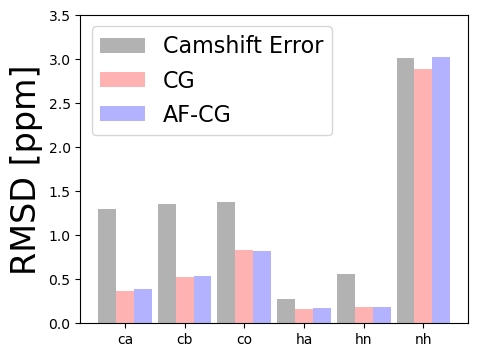

In [57]:
err = {"NH": 3.01, "HN": 0.56, "HA": 0.28, "CA": 1.3, "CB": 1.36, "CO": 1.38}

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
for d in sorted(tuple(err.items())):
    print (d[1])
for d in sorted(tuple(rmsderr.items())):
    print(d[1][0])

    
ax.bar(np.arange(6)-0.3, [d[1] for d in sorted(tuple(err.items()))], capsize=8,
       color='black', alpha=0.3, label="Camshift Error",width=0.3)
for d in sorted(tuple(rmsderr.items())):
    print(d)

ax.bar(np.arange(6), [d[1][0] for d in sorted(tuple(rmsderr.items()))] ,
       capsize=8, color='red',alpha=0.3, label="CG",width=0.3)
ax.bar(np.arange(6)+.3, [d[1][0] for d in sorted(tuple(rmsderr_AF.items()))] ,
       capsize=8, color='blue',alpha=0.3, label="AF-CG",width=0.3)
ax.set_xticks(np.arange(6))
ax.set_xticklabels([d for d in rmsderr])

ax.set_ylabel("RMSD [ppm]", fontsize=24)
ax.set_ylim(0, 3.5)

ax.legend(fontsize=16)
plt.savefig(data_f+'RMSD_err.pdf',bbox_inches='tight')



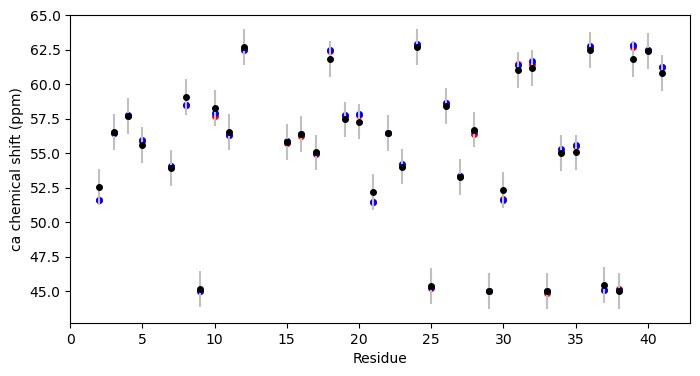

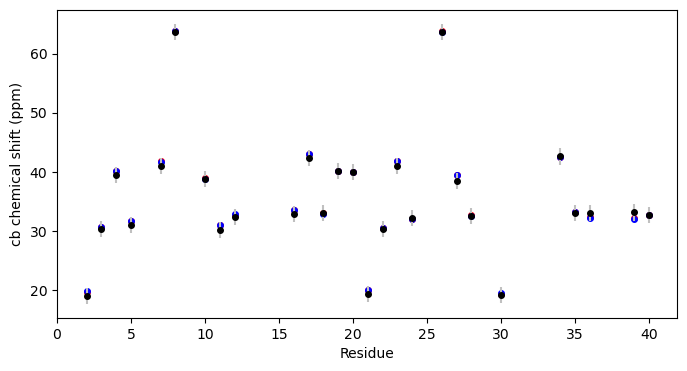

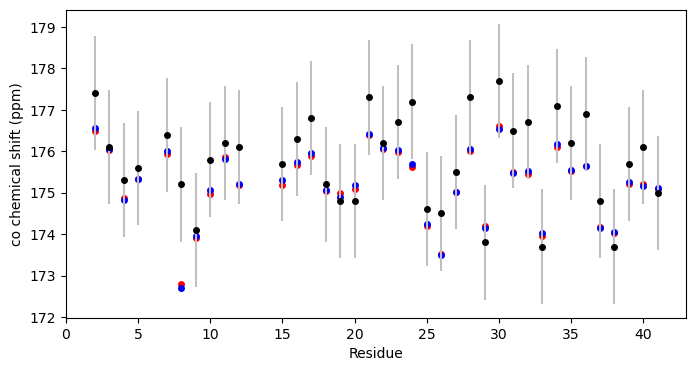

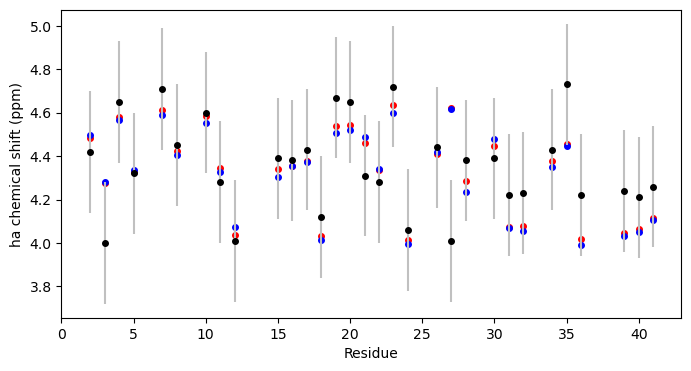

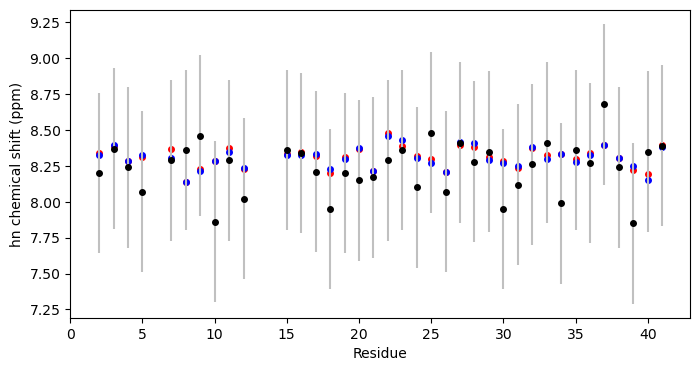

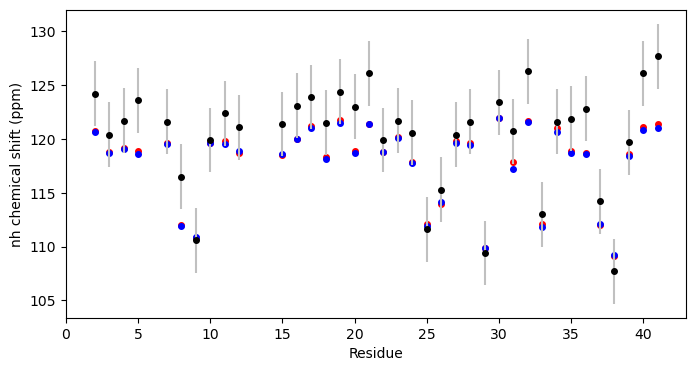

In [58]:
#Plot camshift 
camshift_errs = {'ca': 1.3, 'cb': 1.36, 'co': 1.38, 'ha': 0.28, 'hn': 0.56, 'nh': 3.01}

for k in cs_residues.keys():
    fig = plt.figure(figsize=(8, 4))
    ax = fig.add_subplot(111)
    yerror = [ camshift_errs[k] for i in range(len(cs_residues[k]))]
    ax.errorbar(cs_residues[k], data_dict[k].mean(axis=0), yerr=yerror, fmt='o', markersize='4', color='black', ecolor='silver')


    ax.scatter(cs_residues[k], csAB_means[k], color='red',s=4**2)
    ax.scatter(cs_residues[k], csAB_means_AF[k], color='blue',s=4**2)
    ax.set_xlabel("Residue")
    ax.set_ylabel("{} chemical shift (ppm)".format(k))

    ax.set_xticks(np.arange(0, 42, step=5));
    plt.savefig(str(data_f)+'/'+str(k)+'_CS.pdf'.format(i), format='pdf', dpi=2000, transparent=True)